<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 사진이나 이미지, 동영상 등은 대체적을 용량이 커서 보관하기 힘들기 때문에 주성분만 분석해서 가지고 있으면 디스크 용량 등에 이로움이 있다.(차원축소 알고리즘)
* 데이터가 가진 속성을 특성이라고 함(사진의 특성 : R(빨) G(녹) B(파) K(검) ,A(필터))
* 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다.-> 차원(dimension : 디멘션)

>  이미지

* 특성이 많으면 선형모델의 성능이 높아지고 훈련데이터에 쉽게 과대적합된다.

* 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함

* 주성분 분석(PCA, Principal Component Analysis) : 줄어진 차원에서 다시 원본차원으로 손실을 최대한 줄이면서 복원할 수도 있어야 함

> https://ddongwon.tistory.com/114

* 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해(분산 : 데이터가 널리 퍼져있는 정도) -> 데이터를 잘 표현하는 벡터?



In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:50:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:43--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA   # 주성분분석 알고리즘 사용

pca = PCA(n_components=50)  # PCA 클래스를 만들 때 주성분의 개수 지정 : 50개
pca.fit(fruits_2d)  # 비지도학습으로 타겟 제외 학습

PCA(n_components=50)

In [3]:
print(pca.components_.shape) # components_ 주성분이 들어있는 속성
# 50개의 속성에 10000(100*100해상도)개의 특성 개수

(50, 10000)


In [4]:
print(pca.components_[:2])

[[-9.24490195e-06 -5.10601298e-06 -8.91640398e-06 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.69701613e-05  1.13551050e-05  1.82152563e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [6]:
# 배열의 값을 이용해 이미지로 출력하는 메서드
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): # ratio = 1 : 비율
    n= len(arr) # 샘플개수
    rows = int(np.ceil(n/10))   # 한줄에 10개씩 이미지 그리기 : 샘플개수를 10으로 나누어 전체 행 개수 계산
    cols = n if rows < 2 else 10    # 행이 1개이면 열개수==샘플개수, 아니면 10개
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

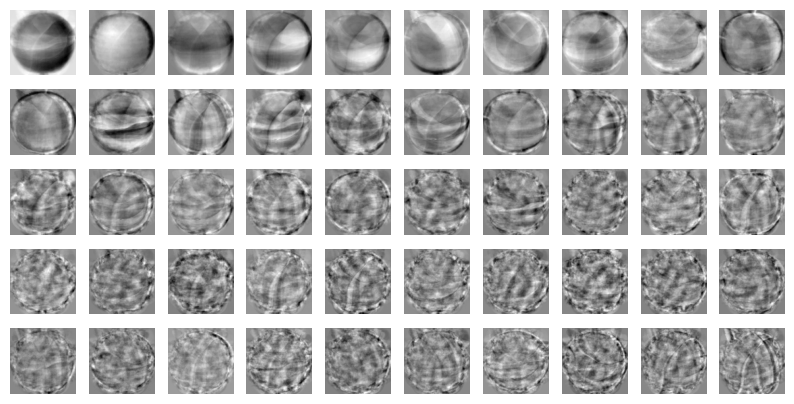

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))  # 10*5 = 50
# 주성분은 원본데이터를 투영하여 특성의 개수를 만들어냄
# 이 주성분은 원본데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
# 데이터셋에 있는 어떤 특징을 잡아낸 것 처럼 생각해도 됨

In [9]:
# 주성분을 찾았으니, 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.
# -> 원본의 분해
# transform() 메서드를 사용해서 원본데이터의 차원을 줄여본다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [11]:
# 10000개의 특성을 50개로 줄였으니 어느정도의 손실이 발생할 수 있다.
# 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본데이터를 상당부분 재구성이 가능하다.
# 원본데이터의 재구성 : inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


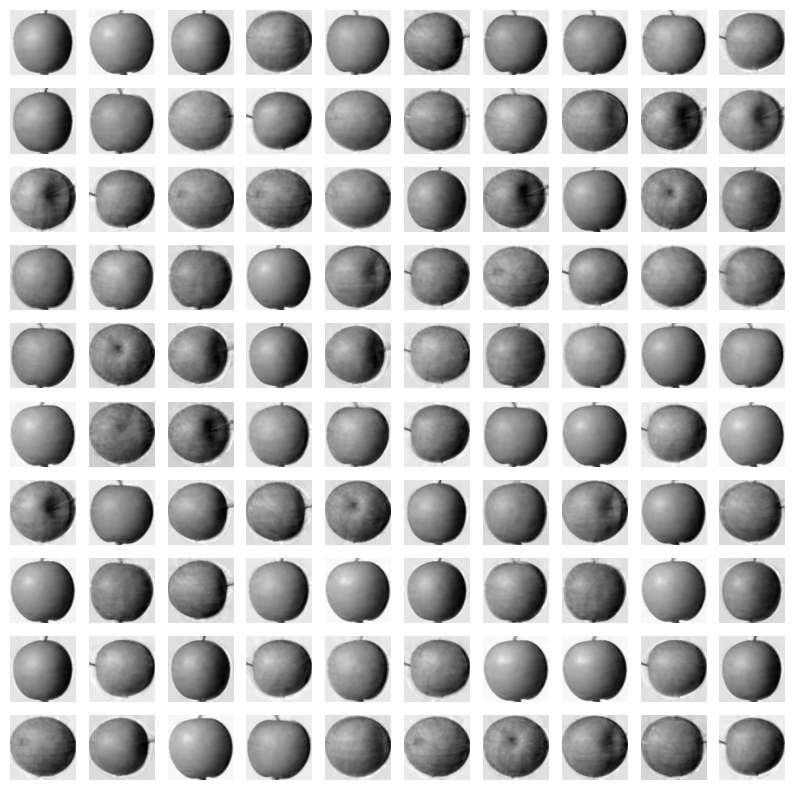

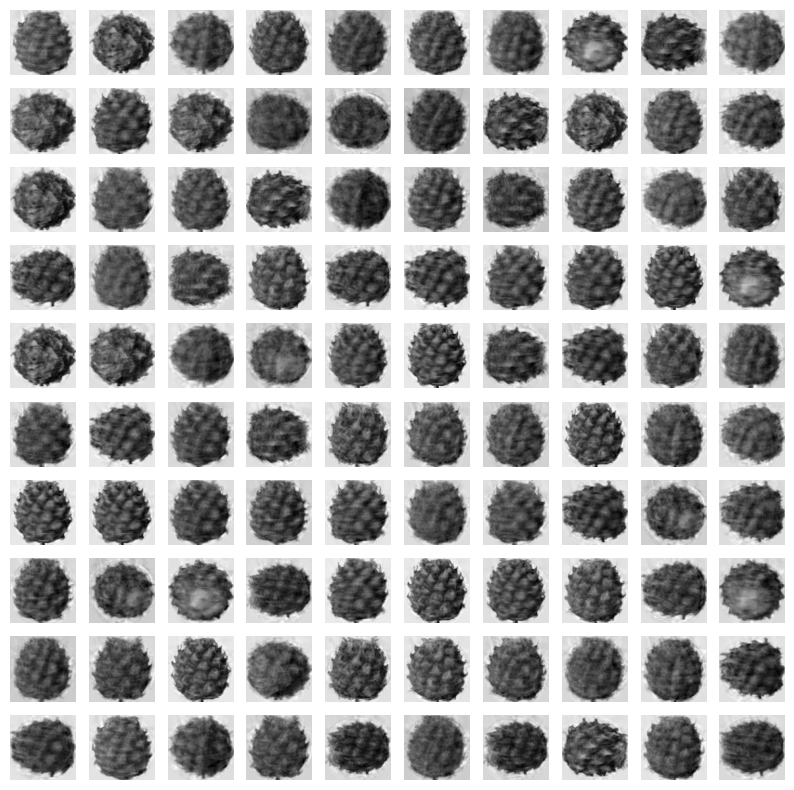

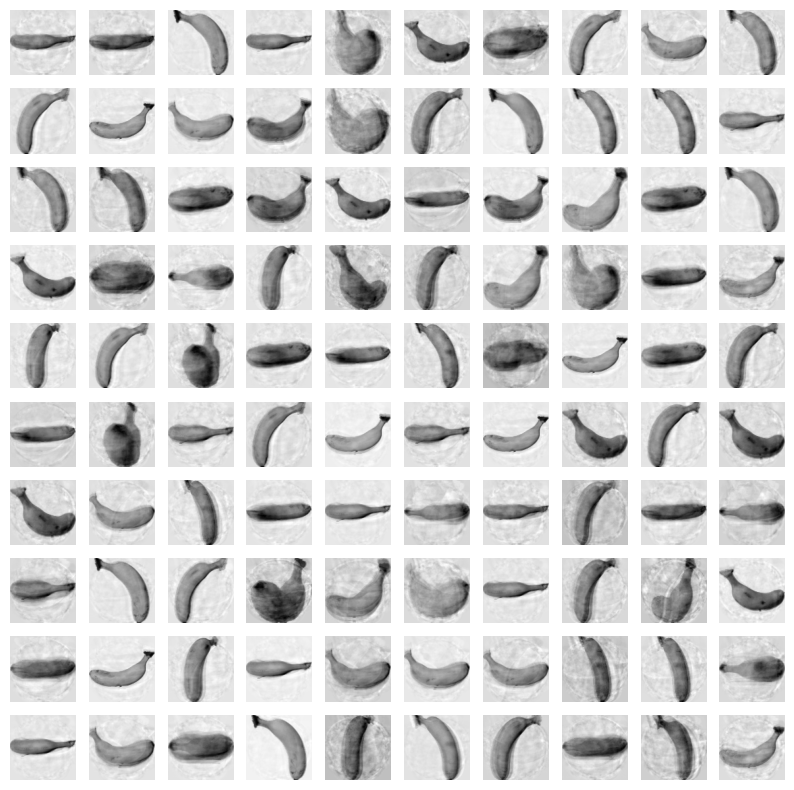

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [13]:
# 거의 모든 파일이 잘 복원된듯 보인다. 특징을 잘 찾아낸 것 같고
# 일부 흐리고 번진 부분도 있지만 중요한 특성은 아님
# 불과 50개의 특성을 10,000개로 늘린것을 감안하면 성공적인듯 하다.
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
# 50개의 특성은 얼마나 분산을 보존하고 있을까를 알아보자.

# 설명된 분산(explained variance) : 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래서의 explained_variance_ratio 에 주성분의 설명된 분산 비율이 기록되어 있음
# 첫번째 주성분의 설명된 분산이 가장 큼
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율

print(np.sum(pca.explained_variance_ratio_)) # 92.15% 분산비율-> 이미지 품질

0.9215377223818723


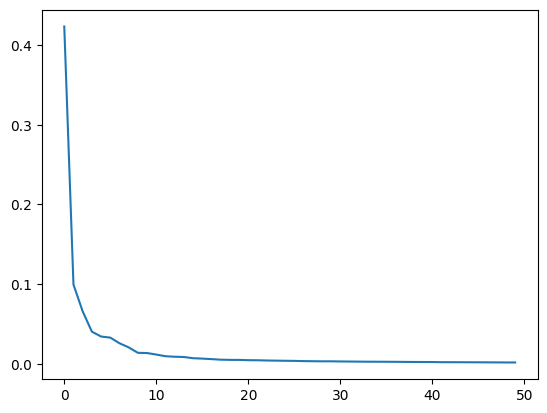

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있음 -> 처음 학습하는 10개가 가장 중요하다!!!

In [16]:
# 위에 만든 주성분으로 지도학습 모델에 적용해보자.
# 로지스틱 회귀모델을 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [19]:
# 지도학습 모델을 사용하기 위해 타깃 생성
# 사과0, 파인애플 1, 바나나 2
target = np.array([0]*100+[1]*100+[2]*100)  # 정답파일 생성
# 파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함
# 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [20]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)  # 원본데이터 사용
print(np.mean(scores['test_score']))    # 99% 과대적합
# 특성이 10000개나 되기 때문에 300개의 샘플에서는 과대적합 모델이 됨
print(np.mean(scores['fit_time']))  # 1.44s

0.9966666666666667
1.4392117023468018


In [21]:
scores = cross_validate(lr, fruits_pca, target) # PCA로 축소한 자료 사용
print(np.mean(scores['test_score']))    # 99% 과대적합
print(np.mean(scores['fit_time']))      # 0.012s
# 분석 결과는 같지만 속도가 빠르고 용량도 작다.
# PCA로 훈련데이터의 차원을 축소하면 저장공간과 시간을 절약할 수 있다.

0.9966666666666667
0.012235498428344727


In [22]:
# 앞에서는 PCA 클래스를 사용할 때 n_components 매개변수에 주성분 개수를 50개로 진행해봤다.
# 이 대신 비율로 줄 수도 있다.(50%)

pca = PCA(n_components=0.5) # 주성분 50%(0~1사이의 실수로 입력)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
print(pca.n_components_)
# 2: 2개의 주성분(특성)만으로 원본데이터의 분산 50%를 표현할 수 있다.

2


In [25]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 300개 요소에 2개의 주성분

(300, 2)


In [26]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.02693910598754883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

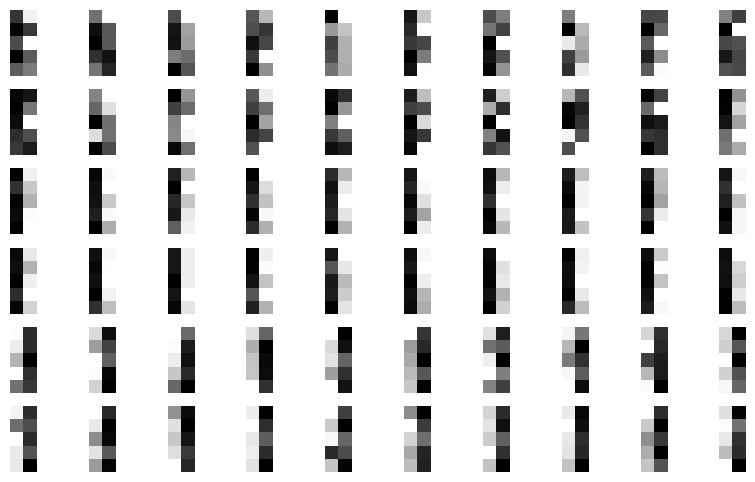

In [31]:
draw_fruits(fruits_pca.reshape(-1, 5, 2))

In [32]:
from sklearn.cluster import KMeans
#차원 축소된 데이터를 사용해서 K-평균 알고리즘으로 클러스터를 찾아봄
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [33]:
print(np.unique(km.labels_, return_counts=True))
# 이전 분석값 : (array([0, 1, 2], dtype=int32), array([112,  98,  90]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


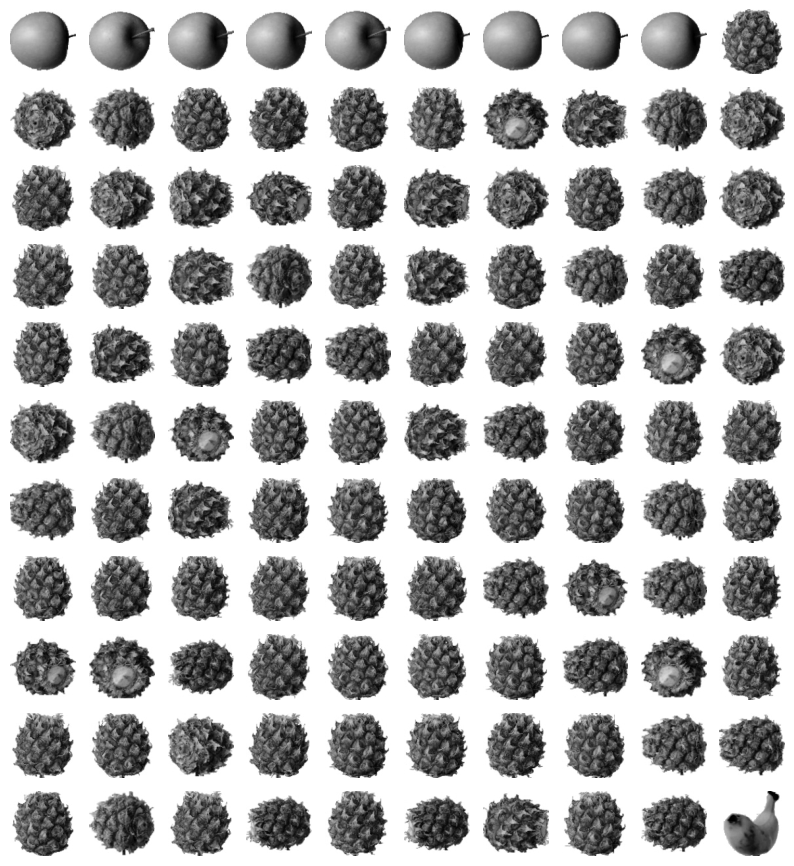

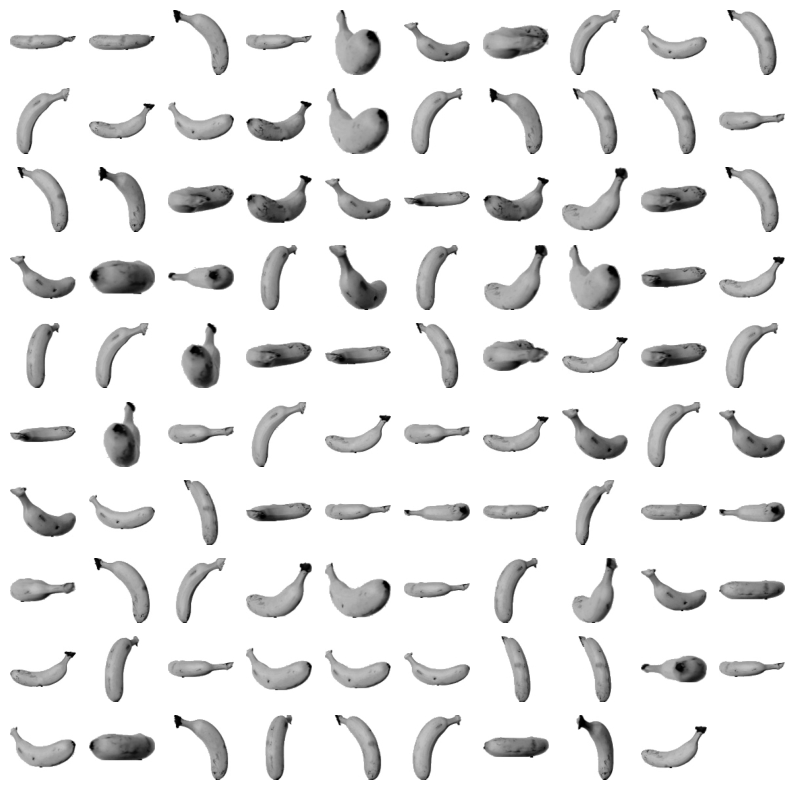

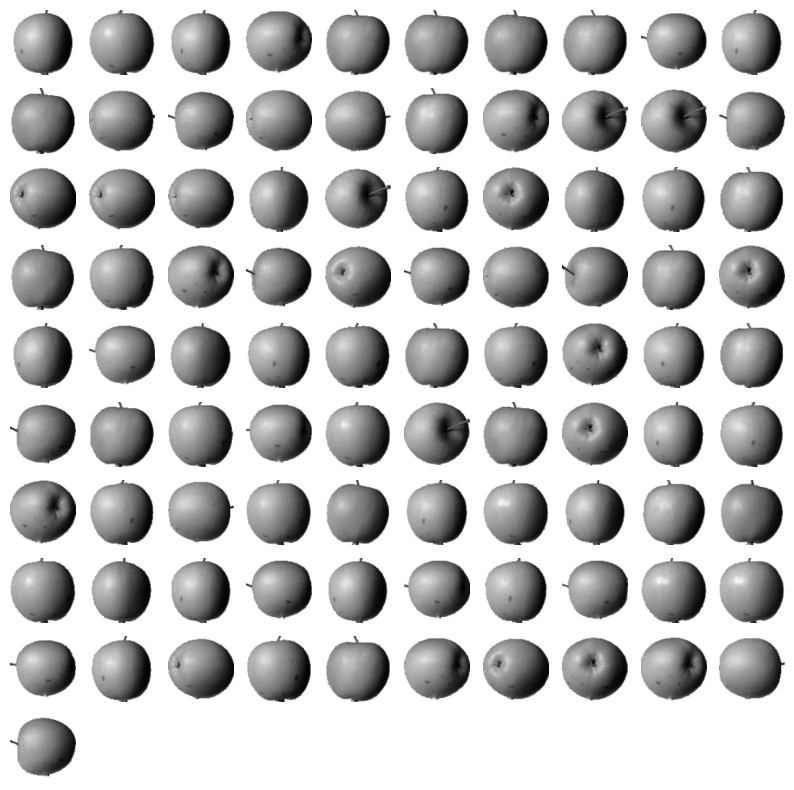

In [34]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

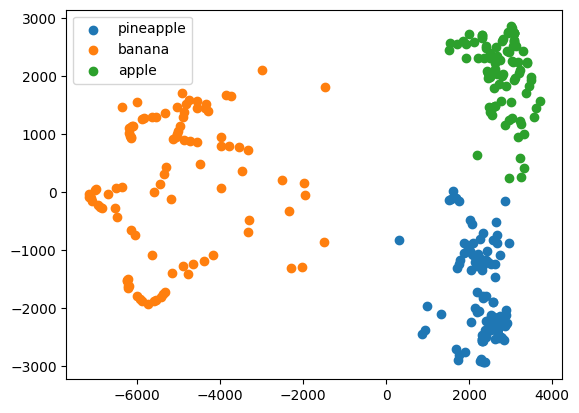

In [35]:
# 훈련데이터 차원을 줄이면 또하나 얻을 수 있는 장점은 시각화가 가능하다.
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
# fruits_pca 데이터가 2개의 특성으로 있기 때문에 2차원으로 표현할 수도 있다.

for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    #km.labels_를 사용해 클러스터 별로 나누어 산점도를 그림
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()